In [1]:
import os, sys

ruta_raiz = os.path.abspath("..")
if ruta_raiz not in sys.path:
    sys.path.append(ruta_raiz)

In [2]:
import numpy as np
import random
import torch
import torch.nn as nn
from collections import deque
from mpe2 import simple_tag_v3
import supersuit as ss
from NGUMultiAgent.NGUMulti import NGUMultiAgent
from NGU.DQN import DQN as NGU_DQN
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class FakeEnv:
    def __init__(self, observation_space, action_space):
        self.observation_space = observation_space
        self.action_space = action_space

In [4]:
seed = 42

base_params = dict(
    learning_rate = 0.001,
    buffer_size = 1000000,
    learning_starts = 5000,
    batch_size = 128,
    tau = 1.0,
    gamma = 0.99,
    train_freq = 16,
    gradient_steps = 4,
    target_update_interval = 2000,
    exploration_fraction = 0.1,
    exploration_initial_eps = 1,
    exploration_final_eps = 0.1,
    max_grad_norm = 10,
    verbose = 0,
    beta = 0.1
)

In [5]:
def run_agent(filename):
    env = simple_tag_v3.parallel_env(render_mode='rgb_array', num_good=1, num_adversaries=3, num_obstacles=0, max_cycles=150, dynamic_rescaling = True)
    env.reset(seed=seed)
    agents = env.agents

    agent_dict = {
        agent: NGU_DQN(FakeEnv(env.observation_space(agent), env.action_space(agent)), **base_params)
        for agent in agents if agent.startswith("adversary")
    }

    trainer = NGUMultiAgent(env, agent_dict, total_timesteps=200_000, log_interval=100)
    trainer.learn()
    trainer.save_rewards_to_csv(filename)
    trainer.plot_total_rewards()
    #trainer.evaluate(episodes=20)
    #trainer.render_and_save(num_tests=5, save_path="demo_shared_def.mp4", fps=5, max_steps=50)

Corriendo run 1
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 233
|    time_elapsed     | 64
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 8.80 | loss: 0.1504 | eps: 0.933
| adversary_1 -> mean_ep_rew | 8.80 | loss: 0.0052 | eps: 0.933
| adversary_2 -> mean_ep_rew | 8.80 | loss: 0.1434 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 198
|    time_elapsed     | 151
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 11.80 | loss: 0.0309 | eps: 0.865
| adversary_1 -> mean_ep_rew | 11.80 | loss: 0.0988 | eps: 0.865
| adversary_2 -> mean_ep_rew | 11.80 | loss: 0.0975 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    f

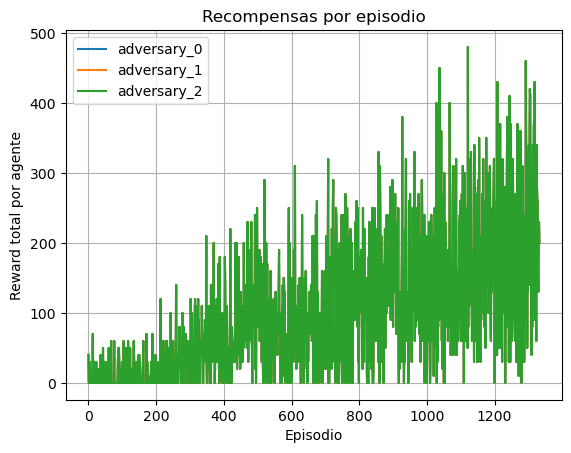

Corriendo run 2
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 236
|    time_elapsed     | 63
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 10.60 | loss: 0.1437 | eps: 0.933
| adversary_1 -> mean_ep_rew | 10.60 | loss: 0.0030 | eps: 0.933
| adversary_2 -> mean_ep_rew | 10.60 | loss: 0.0062 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 202
|    time_elapsed     | 148
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 12.90 | loss: 0.0771 | eps: 0.865
| adversary_1 -> mean_ep_rew | 12.90 | loss: 0.1676 | eps: 0.865
| adversary_2 -> mean_ep_rew | 12.90 | loss: 0.0367 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|  

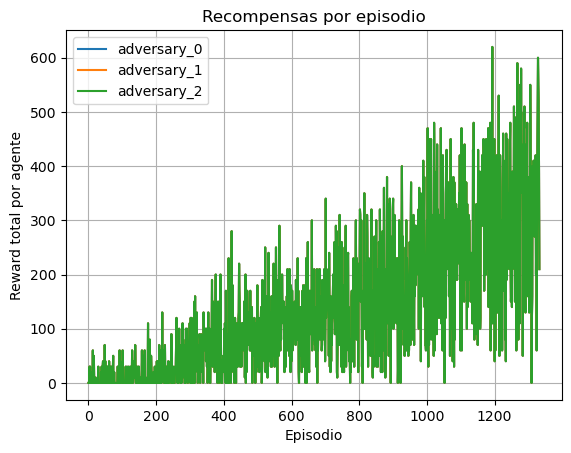

Corriendo run 3
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 229
|    time_elapsed     | 65
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 10.80 | loss: 0.0818 | eps: 0.933
| adversary_1 -> mean_ep_rew | 10.80 | loss: 0.0051 | eps: 0.933
| adversary_2 -> mean_ep_rew | 10.80 | loss: 0.0048 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 196
|    time_elapsed     | 152
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 15.90 | loss: 0.2645 | eps: 0.865
| adversary_1 -> mean_ep_rew | 15.90 | loss: 0.0925 | eps: 0.865
| adversary_2 -> mean_ep_rew | 15.90 | loss: 0.0264 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|  

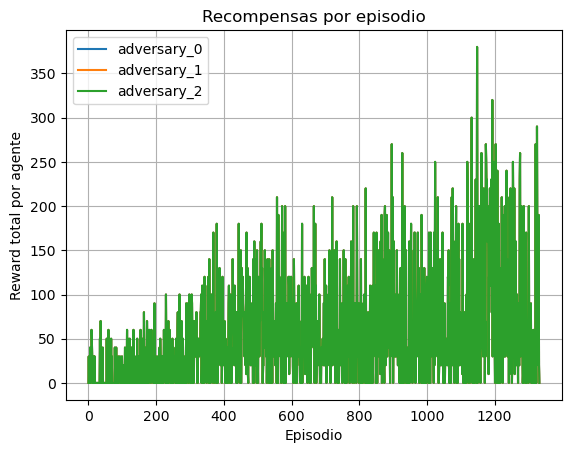

Corriendo run 4
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 236
|    time_elapsed     | 63
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 9.30 | loss: 0.0038 | eps: 0.933
| adversary_1 -> mean_ep_rew | 9.30 | loss: 0.0109 | eps: 0.933
| adversary_2 -> mean_ep_rew | 9.30 | loss: 0.0021 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 200
|    time_elapsed     | 149
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 17.20 | loss: 0.1867 | eps: 0.865
| adversary_1 -> mean_ep_rew | 17.20 | loss: 0.0280 | eps: 0.865
| adversary_2 -> mean_ep_rew | 17.20 | loss: 0.0982 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    f

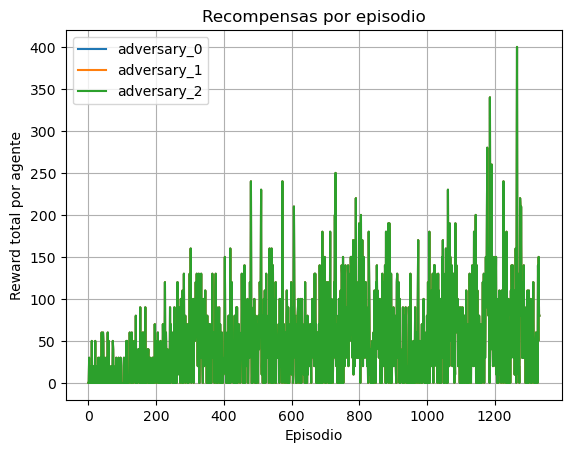

Corriendo run 5
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 235
|    time_elapsed     | 63
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 13.40 | loss: 0.0678 | eps: 0.933
| adversary_1 -> mean_ep_rew | 13.40 | loss: 0.0734 | eps: 0.933
| adversary_2 -> mean_ep_rew | 13.40 | loss: 0.0746 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 200
|    time_elapsed     | 149
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 14.00 | loss: 0.0922 | eps: 0.865
| adversary_1 -> mean_ep_rew | 14.00 | loss: 0.0639 | eps: 0.865
| adversary_2 -> mean_ep_rew | 14.00 | loss: 0.1066 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|  

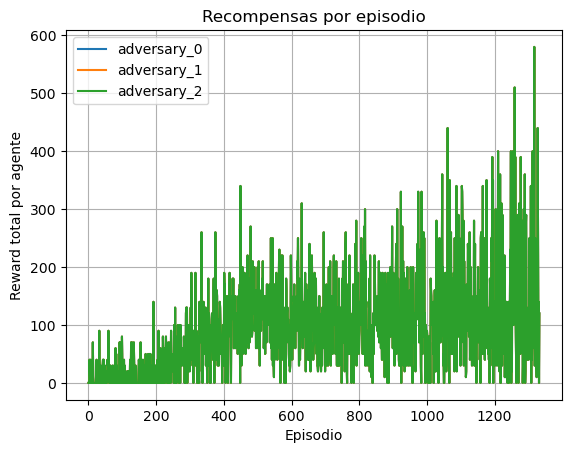

Corriendo run 6
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 228
|    time_elapsed     | 65
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 9.10 | loss: 0.0028 | eps: 0.933
| adversary_1 -> mean_ep_rew | 9.10 | loss: 0.1449 | eps: 0.933
| adversary_2 -> mean_ep_rew | 9.10 | loss: 0.1488 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 197
|    time_elapsed     | 152
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 14.80 | loss: 0.1052 | eps: 0.865
| adversary_1 -> mean_ep_rew | 14.80 | loss: 0.0182 | eps: 0.865
| adversary_2 -> mean_ep_rew | 14.80 | loss: 0.0109 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    f

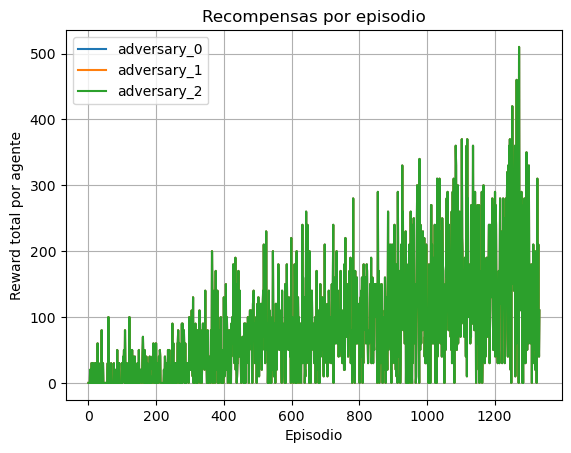

Corriendo run 7
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 236
|    time_elapsed     | 63
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 10.00 | loss: 0.1456 | eps: 0.933
| adversary_1 -> mean_ep_rew | 10.00 | loss: 0.0042 | eps: 0.933
| adversary_2 -> mean_ep_rew | 10.00 | loss: 0.0047 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 201
|    time_elapsed     | 148
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 10.00 | loss: 0.0164 | eps: 0.865
| adversary_1 -> mean_ep_rew | 10.00 | loss: 0.0091 | eps: 0.865
| adversary_2 -> mean_ep_rew | 10.00 | loss: 0.0866 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|  

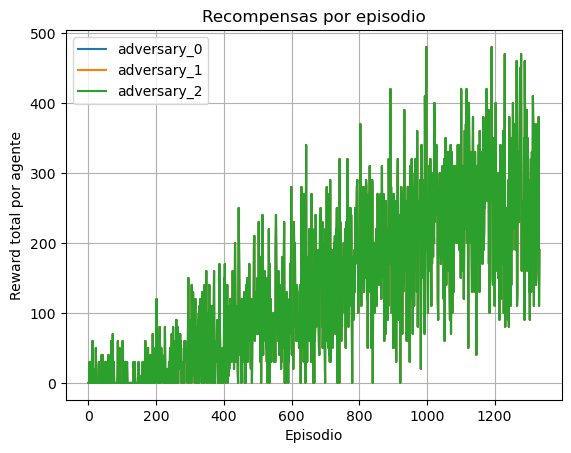

Corriendo run 8
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 235
|    time_elapsed     | 63
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 8.80 | loss: 0.2262 | eps: 0.933
| adversary_1 -> mean_ep_rew | 8.80 | loss: 0.0728 | eps: 0.933
| adversary_2 -> mean_ep_rew | 8.80 | loss: 0.0746 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 201
|    time_elapsed     | 148
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 15.30 | loss: 0.0765 | eps: 0.865
| adversary_1 -> mean_ep_rew | 15.30 | loss: 0.0786 | eps: 0.865
| adversary_2 -> mean_ep_rew | 15.30 | loss: 0.0881 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    f

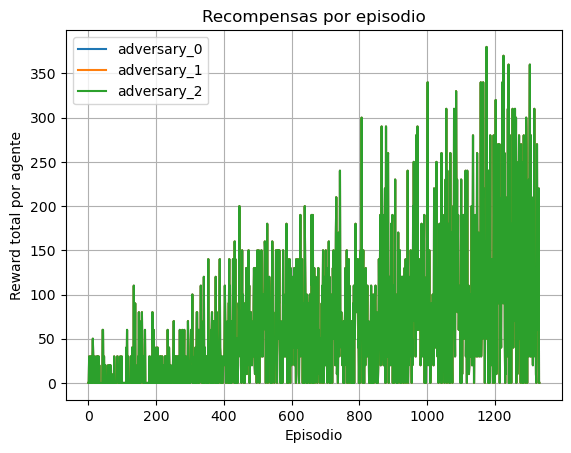

Corriendo run 9
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 236
|    time_elapsed     | 63
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 10.40 | loss: 0.1361 | eps: 0.933
| adversary_1 -> mean_ep_rew | 10.40 | loss: 0.0036 | eps: 0.933
| adversary_2 -> mean_ep_rew | 10.40 | loss: 0.0764 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 201
|    time_elapsed     | 148
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 14.40 | loss: 0.0164 | eps: 0.865
| adversary_1 -> mean_ep_rew | 14.40 | loss: 0.2711 | eps: 0.865
| adversary_2 -> mean_ep_rew | 14.40 | loss: 0.2186 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|  

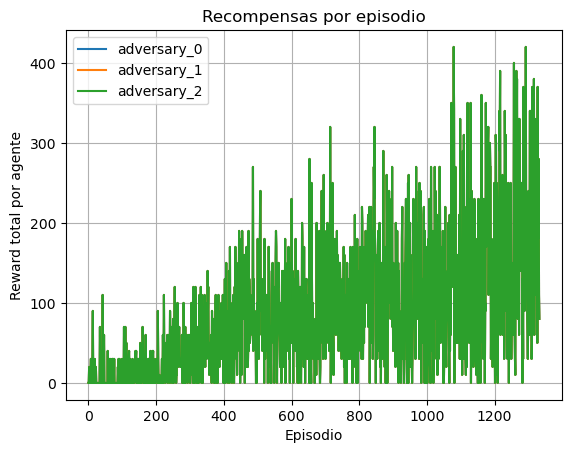

Corriendo run 10
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 236
|    time_elapsed     | 63
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 11.50 | loss: 0.0834 | eps: 0.933
| adversary_1 -> mean_ep_rew | 11.50 | loss: 0.0801 | eps: 0.933
| adversary_2 -> mean_ep_rew | 11.50 | loss: 0.0049 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 201
|    time_elapsed     | 148
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 18.80 | loss: 0.0183 | eps: 0.865
| adversary_1 -> mean_ep_rew | 18.80 | loss: 0.0402 | eps: 0.865
| adversary_2 -> mean_ep_rew | 18.80 | loss: 0.1737 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
| 

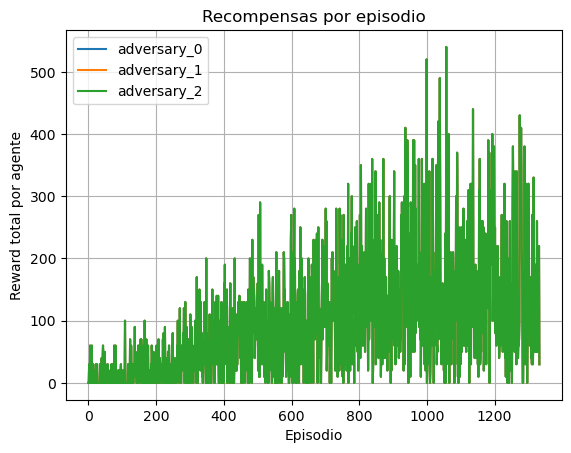

Corriendo run 11
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 236
|    time_elapsed     | 63
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 12.10 | loss: 0.1523 | eps: 0.933
| adversary_1 -> mean_ep_rew | 12.10 | loss: 0.1515 | eps: 0.933
| adversary_2 -> mean_ep_rew | 12.10 | loss: 0.0790 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 202
|    time_elapsed     | 148
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 12.40 | loss: 0.1131 | eps: 0.865
| adversary_1 -> mean_ep_rew | 12.40 | loss: 0.1769 | eps: 0.865
| adversary_2 -> mean_ep_rew | 12.40 | loss: 0.1598 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
| 

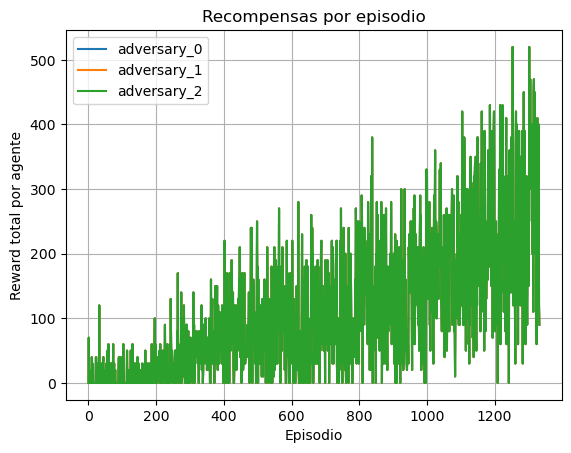

Corriendo run 12
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 217
|    time_elapsed     | 69
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 8.50 | loss: 0.1351 | eps: 0.933
| adversary_1 -> mean_ep_rew | 8.50 | loss: 0.2249 | eps: 0.933
| adversary_2 -> mean_ep_rew | 8.50 | loss: 0.0691 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 174
|    time_elapsed     | 171
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 13.60 | loss: 0.0341 | eps: 0.865
| adversary_1 -> mean_ep_rew | 13.60 | loss: 0.0859 | eps: 0.865
| adversary_2 -> mean_ep_rew | 13.60 | loss: 0.2437 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    

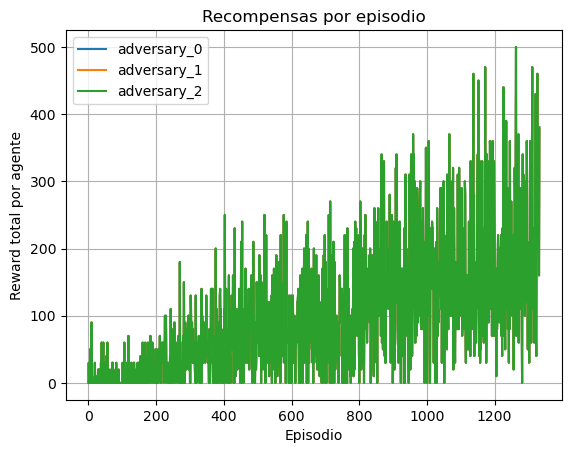

Corriendo run 13
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 204
|    time_elapsed     | 73
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 9.90 | loss: 0.0025 | eps: 0.933
| adversary_1 -> mean_ep_rew | 9.90 | loss: 0.0023 | eps: 0.933
| adversary_2 -> mean_ep_rew | 9.90 | loss: 0.0739 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 171
|    time_elapsed     | 174
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 13.00 | loss: 0.0971 | eps: 0.865
| adversary_1 -> mean_ep_rew | 13.00 | loss: 0.1147 | eps: 0.865
| adversary_2 -> mean_ep_rew | 13.00 | loss: 0.0177 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    

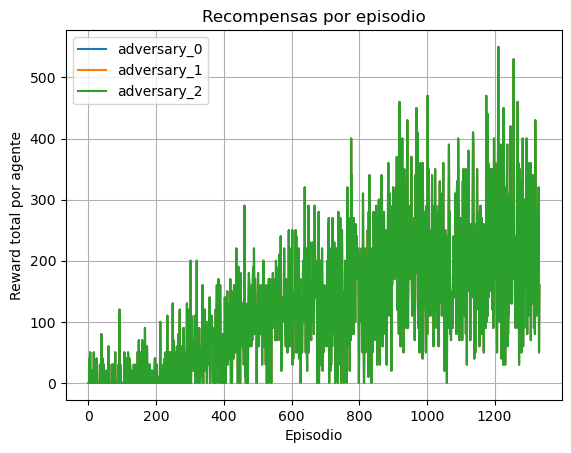

Corriendo run 14
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 235
|    time_elapsed     | 63
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 10.00 | loss: 0.0034 | eps: 0.933
| adversary_1 -> mean_ep_rew | 10.00 | loss: 0.0050 | eps: 0.933
| adversary_2 -> mean_ep_rew | 10.00 | loss: 0.0096 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 201
|    time_elapsed     | 149
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 15.80 | loss: 0.0911 | eps: 0.865
| adversary_1 -> mean_ep_rew | 15.80 | loss: 0.0207 | eps: 0.865
| adversary_2 -> mean_ep_rew | 15.80 | loss: 0.0879 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
| 

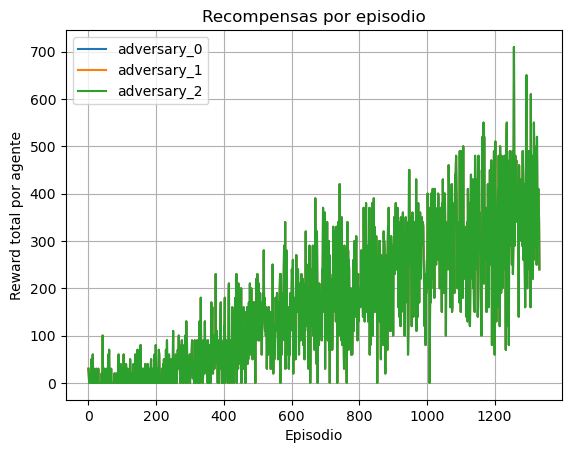

Corriendo run 15
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 236
|    time_elapsed     | 63
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 11.50 | loss: 0.1502 | eps: 0.933
| adversary_1 -> mean_ep_rew | 11.50 | loss: 0.0824 | eps: 0.933
| adversary_2 -> mean_ep_rew | 11.50 | loss: 0.0800 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 202
|    time_elapsed     | 147
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 13.30 | loss: 0.0239 | eps: 0.865
| adversary_1 -> mean_ep_rew | 13.30 | loss: 0.0136 | eps: 0.865
| adversary_2 -> mean_ep_rew | 13.30 | loss: 0.2057 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
| 

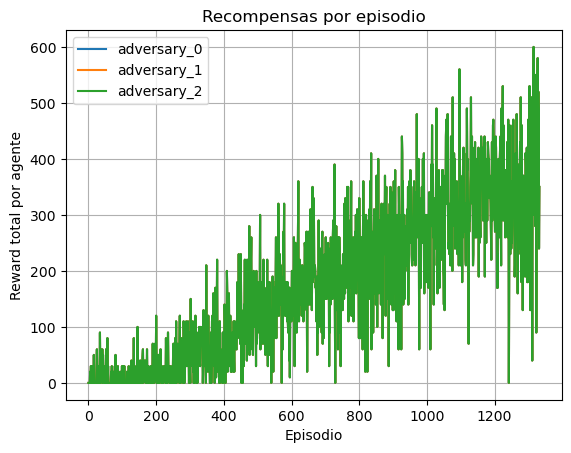

In [9]:
for i in range(1, 16):
    print(f"Corriendo run {i}")
    run_agent(f"runs_multi_ngu/multi_ngu_run_{i}.csv")

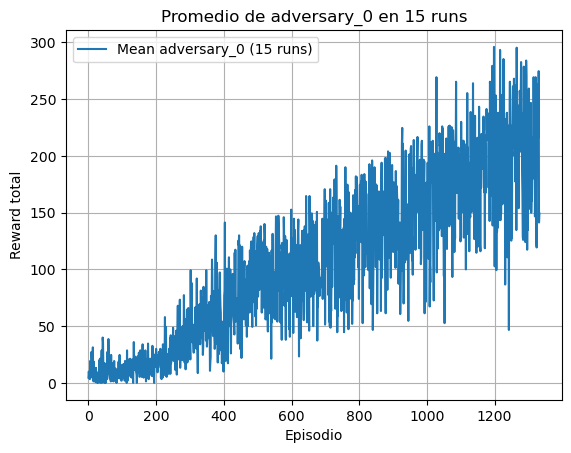

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de 15 runs
runs = [f"runs_multi_ngu/multi_ngu_run_{i}.csv" for i in range(1, 16)]
agent = "adversary_0"

dfs = []
for run in runs:
    df = pd.read_csv(run)
    if agent not in df.columns:
        print(f"{agent} no está en {run}")
        continue
    dfs.append(df[[ "episode", agent ]])

# Combinar todos los dataframes por episodio
merged = dfs[0].copy()
for i, df in enumerate(dfs[1:], start=2):
    merged = merged.merge(df, on="episode", suffixes=("", f"_{i}"))

# Calcular el promedio fila por fila de adversary_0
adversary_cols = [c for c in merged.columns if agent in c]
merged["mean"] = merged[adversary_cols].mean(axis=1)

# Graficar el promedio
plt.plot(merged["episode"], merged["mean"], label=f"Mean {agent} (15 runs)")
plt.xlabel("Episodio")
plt.ylabel("Reward total")
plt.title(f"Promedio de {agent} en 15 runs")
plt.legend()
plt.grid(True)
plt.show()